# Trabalho 1 - PDI


### Bibliotecas

In [130]:
from PIL import Image
import os
from matplotlib.pyplot import imshow, imsave, clf
from matplotlib import pyplot as plt
import numpy as np

### Funções

In [131]:
def open_image(path):
    filename, file_extension = os.path.splitext(path)

    im = Image.open(path)

    return im



def rgb_to_yiq(im):
    
    yiq_To_rgb = np.array([ [ +0.299,      +0.587,      +0.114],
                            [ +0.59590059, -0.27455667, -0.32134392],
                            [ +0.21153661, -0.52273617, +0.31119955]])
        
    img_yiq = np.dot(im, yiq_To_rgb.T)
    
    return img_yiq



def yiq_to_rgb(im_yiq):
    
    rgb_To_yiq = np.array([ [ +1.0, +0.9563, +0.6210],
                            [ +1.0, -0.2721, -0.6474],
                            [ +1.0, -1.1070, +1.7046]])
    

    img_rgb = np.dot(im_yiq, rgb_To_yiq.T)
    img_rgb = img_rgb.astype(int)
    img_rgb  = np.clip(img_rgb , a_min = 0, a_max = 255) 

    return img_rgb

def plot_channels(im, channels, negative=False, label=""):
    
    figure, plots = plt.subplots(ncols=3, nrows=1)

    for i, subplot in zip(range(3), plots):
        temp = np.zeros(im.shape, dtype='int')    
        temp[:,:,i] = im[:,:,i] if not negative else (255 - im[:,:,i])
        subplot.imshow(temp)
        imsave('imgs/' + label + channels[i] + '.png', temp)
        subplot.set_axis_off()
    plt.show()
    
    
def plot_negative_by_channels(im, channels, channel):

    temp = np.zeros(im.shape, dtype='int')    
    temp = im.copy()
    temp[:,:,channel] = 255 - temp[:,:,channel]
    
    clf()
    imshow(temp)
    imsave('imgs/' + 'negative_by_channel_' + channels[channel] + '.png', temp)
    
def addShine(im, shine, channels, channel='none'):

    temp = np.zeros(im.shape, dtype='int')    

    if channel == 'none': 
        temp = np.multiply(im,shine)
        label = ''
    else: 
        temp = im.copy()
        temp[:,:,channel] = np.multiply(temp[:,:,channel],shine)
        
        label = channels[channel]

    temp  = np.clip(temp , a_min = 0, a_max = 255)
    clf()
    imshow(temp)
    imsave('imgs/' + 'shine_' + str(shine) + '_' + label + '.png', temp)

def flip(mask):
    mask=np.flipud(np.fliplr(mask))
    return mask

def read_mask(mask_path):
    f = open(mask_path,"r")

    m = int(f.readline())
    n = int(f.readline())

    list = []
    for lines in f:
        value = lines.split()
        list.append(value)

    mask = np.asarray(list)

    if mask.shape[0] is not m or mask.shape[1] is not n:
        print('erro ao carregar mascára')
        
    return mask, m, n


def conv(im, mask, m, n):
    
    convolution = np.zeros([im.shape[0]-(m-1),im.shape[1]-(n-1), 3], dtype = int)
    
    for linha in range(0, convolution.shape[0]): 
        for coluna in range(0, convolution.shape[1]): 
            for linha_mask in range(0,m):
                    for coluna_mask in range(0,n):
                        convolution[linha,coluna,0] += mask[linha_mask,coluna_mask]*im[linha+linha_mask,coluna+coluna_mask,0]
                        convolution[linha,coluna,1] += mask[linha_mask,coluna_mask]*im[linha+linha_mask,coluna+coluna_mask,1]
                        convolution[linha,coluna,2] += mask[linha_mask,coluna_mask]*im[linha+linha_mask,coluna+coluna_mask,2]

    convolution  = np.clip(convolution, a_min = 0, a_max = 255) 

    imshow(convolution)
    imsave('imgs/' + 'convol' + '.png', convolution)
    
def median(im, m, n):
    mediana = np.zeros([im.shape[0]-(m-1),im.shape[1]-(n-1), 3], dtype = int)

    for linha in range(0, mediana.shape[0]): 
        for coluna in range(0,  mediana.shape[1]): 
            listaR = []
            listaG = []
            listaB = []
            for linha_mask in range(0,m):
                    for coluna_mask in range(0,n):
                        listaR.append(im[linha+linha_mask,coluna+coluna_mask,0])
                        listaG.append(im[linha+linha_mask,coluna+coluna_mask,1])
                        listaB.append(im[linha+linha_mask,coluna+coluna_mask,2])
            mediana[linha,coluna,0] = np.median(listaR)
            mediana[linha,coluna,1] = np.median(listaG)
            mediana[linha,coluna,2] = np.median(listaB)
            
    imshow(mediana)
    imsave('imgs/' + 'mediana' + '.png',  mediana)

### Parametrização

In [155]:
img_path = 'ImagensTeste/CNN1.png'
mask_path = 'mask.txt'
channels = ['R', 'G', 'B']
shine = 2
m = 3
n = 3

### Código

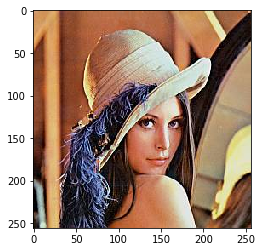

In [133]:
im = open_image(img_path)
im = np.array(im, dtype='int')
im  = np.clip(im , a_min = 0, a_max = 255) 

imshow(im)

#### Conversão RGB -> YIQ -> RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


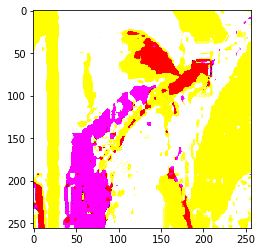

In [134]:
#Convertendo de rgb para yiq 

img_yiq = rgb_to_yiq(im)
imshow(img_yiq)
imsave('imgs/' + 'YIQ' + '.png', img_yiq)


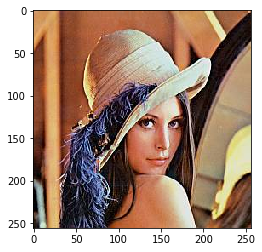

In [135]:
#Convertendo de yiq para rgb

img_rgb = yiq_to_rgb(img_yiq)    
imshow(img_rgb)
imsave('imgs/' + 'RGB' + '.png', img_rgb)


#### Separando canais RGB

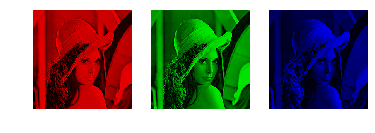

In [136]:
#Separar imagem em três canais (R, G e B)

im = open_image(img_path)
im = np.array(im, dtype='int')
im  = np.clip(im , a_min = 0, a_max = 255) 

plot_channels(im, channels)




#### Negativo

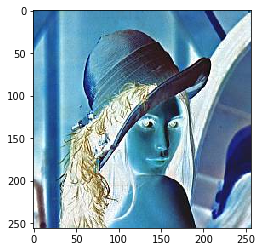

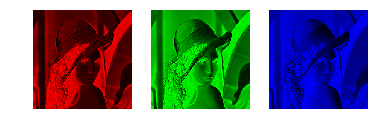

In [137]:
im = open_image(img_path)
im = np.array(im, dtype='int')
im  = np.clip(im , a_min = 0, a_max = 255) 

im_negative = 255 - im
imshow(im_negative)
imsave('imgs/' + 'negative_image' + '.png', im_negative)

plot_channels(im, channels, negative=True, label='negative')


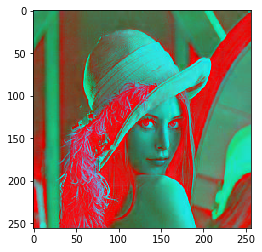

In [138]:
plot_negative_by_channels(im, channels, channel=0)


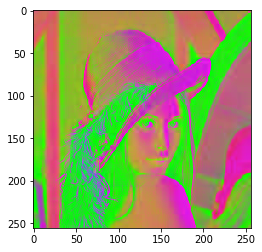

In [139]:
plot_negative_by_channels(im, channels, channel=1)


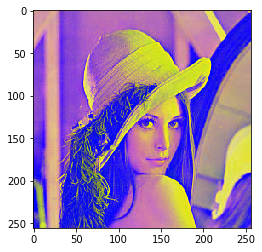

In [140]:
plot_negative_by_channels(im, channels, channel=2)

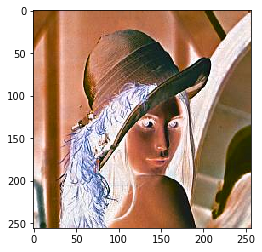

In [141]:
#Negativando canal Y

img_yiq = rgb_to_yiq(im)
img_yiq[:,:,0] = 255 - img_yiq[:,:,0]
img_rgb = yiq_to_rgb(img_yiq)    
                

imshow(img_rgb)
imsave('imgs/' + 'negativeY' + '.png', img_rgb)


#### Controle de brilho multiplicativo

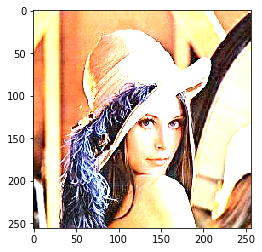

In [142]:
# Brilho Multiplicativo
# Pixel_resultante = Pixel_atual * C

im = open_image(img_path)
im = np.array(im, dtype='int')
im  = np.clip(im , a_min = 0, a_max = 255) 

addShine(im, shine, channels)



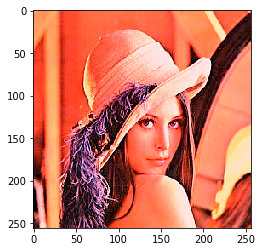

In [143]:
addShine(im, shine, channels, channel=0)


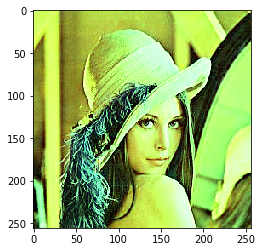

In [144]:
addShine(im, shine, channels, channel=1)


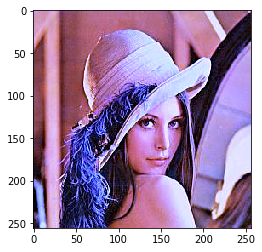

In [145]:
addShine(im, shine, channels, channel=2)

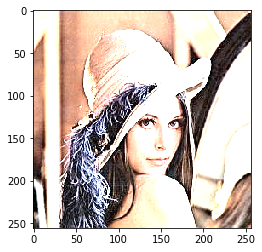

In [146]:
#Aplicando brilho em canal Y

img_yiq = rgb_to_yiq(im)
img_yiq[:,:,0] = np.multiply(img_yiq[:,:,0],shine)
img_rgb = yiq_to_rgb(img_yiq)    
                
imshow(img_rgb)
imsave('imgs/' + 'shineY' + '.png', img_rgb)

#### Convolução

In [156]:
#Carregando máscara
mask, m, n = read_mask(mask_path)

# Rebatendo máscara
mask = flip(mask)
mask = mask.astype(float)
print(mask)

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


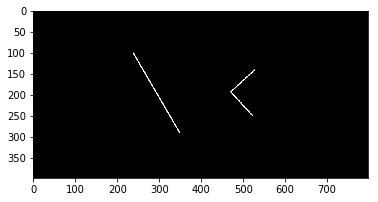

In [157]:
im = open_image(img_path)
im = np.array(im, dtype='int')
im  = np.clip(im , a_min = 0, a_max = 255) 

conv(im, mask, m, n)


#### Filtro Mediana


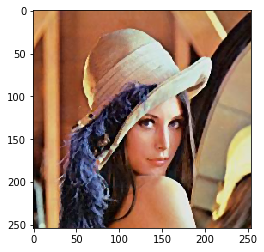

In [152]:
im = open_image(img_path)
im = np.array(im, dtype='int')
im  = np.clip(im , a_min = 0, a_max = 255) 

median(im, m, n)
        
